<a href="https://colab.research.google.com/github/argennof/Data_A-V_2022/blob/main/Lab%202%20preliminar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laboratorio 2: Armado de un esquema de aprendizaje automático

En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [ ]:
import numpy as np
import pandas as pd

# TODO: Agregar las librerías que hagan falta
from sklearn.model_selection import train_test_split

## Carga de datos y división en entrenamiento y evaluación

La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [ ]:
dataset = pd.read_csv("./data/loan_data.csv", comment="#")

# División entre instancias y etiquetas
X, y = dataset.iloc[:, 1:], dataset.TARGET

# división entre entrenamiento y evaluación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

### Respuesta Ejercicio 1

### Introducción
El **Departamento de Crédito** de un banco prentende automatizar el proceso de evaluación de líneas de créditos hipotecarios. Se pretende crear un modelo de calificación crediticia que defina una acción de rechazo. Para su desarrollo se cuenta con información recopilada de los solicitantes a los que se les ha ortogado un crédito previamente.

###  Respuesta Ejercicio 1.1
El conjunto de datos contiene información de 1854 préstamos hipotecarios recientes.
El campo TARGET indica si un solicitante incumplió o se encuentra en morosidad grave.
El conjunto de datos cuenta con 20% de creditos incumplidos (309 muestras).

### Respuesta Ejercicio 1.2

La variable objetivo es identificada como "TARGET" (binaria; 1: NO CUMPLE, 0:Cumple). La cual predice si un cliente solicitante del credito no cumplira con el pago del mismo.

### Respuesta Ejercicio 1.3
Para cada muestra se cuenta con los siguientes atributos:

 - LOAN: Monto del préstamo solicitado
 - MORTDUE: Monto adeudado en la hipoteca existente
 - VALUE: Valor de la propiedad actual
 - YOJ: Años en el trabajo actual
 - DEROG: Número de informes negativos importantes
 - DELINQ: Número de líneas de crédito morosas
 - CLAGE: Edad de la línea comercial más antigua en meses
 - NINQ: Número de líneas de crédito recientes
 - CLNO: Número de líneas de crédito
 - DEBTINC:	Relación deuda-ingresos


### Respuesta Ejercicio 1.4

Podemos intuir que los siguiente atributos puede representar la capacidad de pago del credito y la conducta del acreeder frente a pagos comprometidos.

 - LOAN: Monto del préstamo solicitado
 - DEBTINC:	Relación deuda-ingresos
 - MORTDUE: Monto adeudado en la hipoteca existente
 - DEROG: Número de informes negativos importantes
 - DELINQ: Número de líneas de crédito morosa

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

#### Entrenamiento del modelo. SGDC (Clasificador: stochastic gradient descent)

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Always scale the input. The most convenient way is to use a pipeline.
clf = make_pipeline(StandardScaler(), SGDClassifier(random_state=0))
clf.fit(X_train, y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=0))])

#### Predicción con datos de entrenamiento y test

In [ ]:
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

#### Metricas para el set de test

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay ,classification_report
from utils import plot_confusion_matrix

#### Calculo de métricas para el conjunto de prueba (Test)

Metricas para el conjunto Test
Accuracy = 0.868
Precision= 0.645
Recall   = 0.345
F1       = 0.449


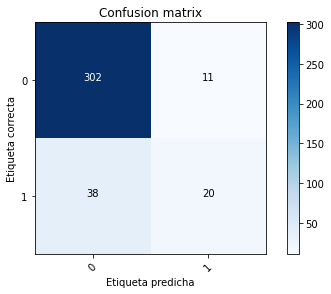

In [ ]:
acc_test=accuracy_score(y_test, y_test_pred)
pre_test=precision_score(y_test, y_test_pred)
rcall_test=recall_score(y_test, y_test_pred)
f1_test=f1_score(y_test, y_test_pred)
cm_test=confusion_matrix(y_test, y_test_pred, labels=clf.classes_)

print(f"Metricas para el conjunto Test")
print(f"Accuracy = {round(acc_test,3)}")
print(f"Precision= {round(pre_test,3)}")
print(f"Recall   = {round(rcall_test,3)}")
print(f"F1       = {round(f1_test,3)}")
plot_confusion_matrix(cm_test, clf.classes_)

#### Calculo de métricas para el conjunto de entrenamiento (training)

Metricas para el conjunto Training
Accuracy = 0.873
Precision= 0.714
Recall   = 0.418
F1       = 0.528


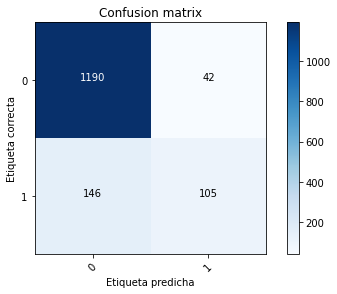

In [ ]:
acc_train = accuracy_score(y_train, y_train_pred)
pre_train = precision_score(y_train, y_train_pred)
rcall_train = recall_score(y_train, y_train_pred)
f1_train = f1_score(y_train, y_train_pred)
cm_train = confusion_matrix(y_train, y_train_pred, labels=clf.classes_)

print(f"Metricas para el conjunto Training")
print(f"Accuracy = {round(acc_train,3)}")
print(f"Precision= {round(pre_train,3)}")
print(f"Recall   = {round(rcall_train,3)}")
print(f"F1       = {round(f1_train,3)}")
plot_confusion_matrix(cm_train, clf.classes_)

#### Conclusiones: analizando ambos reportes notamos valores similares para Accuracy. El conjunto de entenamiento presenta mejores indicadores para la precision, recall y F1, lo cual es lógico dado que fue quien generó el modelo.

### Ejercicio 2.2: Ajuste de Hiperparámetros
PresentacionMetricas_IAA.mp4

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

### Respuesta Ejercicio 2.2

In [ ]:
#### Importación de modulos

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import ParameterGrid
from sklearn.model_selection import GridSearchCV
from tabulate import tabulate

#### Escalado de los atributos de entrenamiento y prueba

In [ ]:
# Stochastic Gradient Descent: es sensible a la escala de los atributos,
# se recomienda enfáticamente escalar sus datos.
scaler = StandardScaler()
scaler.fit(X_train)  # fit only on training data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)  # apply same transformation to test data

#### Configuración de la grilla para aplicar validación cruzada

In [ ]:
param_grid = {
    "loss": ['hinge','huber','perceptron', 'squared_error'],
    "alpha": np.power(10, np.arange(-4, 1, dtype=float)),
    "l1_ratio": np.linspace(0, 1, num=10),
    "eta0":[1,10,100],
}

#### Definición del clasificador

In [ ]:
clf = SGDClassifier(penalty='elasticnet', learning_rate= 'constant',random_state=0)

#### Validación Cruzada con K-Fold=5, metrica = accuracy

In [ ]:
cross_validation = GridSearchCV(clf, param_grid, scoring='accuracy', cv=5)
cross_validation.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=SGDClassifier(learning_rate='constant',
                                     penalty='elasticnet', random_state=0),
             param_grid={'alpha': array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]),
                         'eta0': [1, 10, 100],
                         'l1_ratio': array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ]),
                         'loss': ['hinge', 'huber', 'perceptron',
                                  'squared_error']},
             scoring='accuracy')

#### Reporte de resultados para la Validación Cruzada

In [ ]:
results = cross_validation.cv_results_
params = results['params']
mean = results['mean_test_score']
std = results['std_test_score']
rank = results['rank_test_score']

table=[]
for p, m, s, r in zip(params, mean, std, rank):
    table.append([p['loss'], p['eta0'], p['l1_ratio'], p['alpha'], m, s, r])
print(tabulate(table, headers=["LOSS","ETA0", "L1_r","ALPHA", "MEAN","STD","RANK"]))

LOSS             ETA0      L1_r    ALPHA      MEAN         STD    RANK
-------------  ------  --------  -------  --------  ----------  ------
hinge               1  0          0.0001  0.797723  0.0150167      252
huber               1  0          0.0001  0.795759  0.0636991      257
perceptron          1  0          0.0001  0.828736  0.0292872      125
squared_error       1  0          0.0001  0.548976  0.095618       468
hinge               1  0.111111   0.0001  0.815263  0.0282821      185
huber               1  0.111111   0.0001  0.830769  0.0417892       37
perceptron          1  0.111111   0.0001  0.789651  0.0317891      272
squared_error       1  0.111111   0.0001  0.475355  0.0756144      542
hinge               1  0.222222   0.0001  0.840174  0.0287508       10
huber               1  0.222222   0.0001  0.838147  0.0266179       14
perceptron          1  0.222222   0.0001  0.815247  0.0166463      187
squared_error       1  0.222222   0.0001  0.592791  0.105146       427
hinge 

#### Presentación de los parametros y metricas asociados al modelo de mayor ranking

In [ ]:
print(cross_validation.best_estimator_)
indice_best=params.index(cross_validation.best_params_)
print(f"Accuracy: {round(mean[indice_best],3)}  Std: {round(std[indice_best],3)}  Rank: {rank[indice_best]}")

SGDClassifier(alpha=0.001, eta0=1, l1_ratio=0.7777777777777777,
              learning_rate='constant', loss='perceptron', penalty='elasticnet',
              random_state=0)
Accuracy: 0.854  Std: 0.013  Rank: 1


#### Implementacion del modelo para predecir a partir el conjunto de prueba y entrenamiento

In [ ]:
best_clf = SGDClassifier(alpha=0.001, eta0=1, l1_ratio=0.7777777777777777,
                         learning_rate='constant', loss='perceptron',
                         penalty='elasticnet', random_state=0)

best_clf.fit(X_train, y_train)
y_test_pred_b = best_clf.predict(X_test)
y_train_pred_b = best_clf.predict(X_train)

#### Metricas para el conjunto de prueba

Metricas para el conjunto test(prueba)
Accuracy = 0.841
Precision= 0.488
Recall   = 0.362
F1       = 0.416


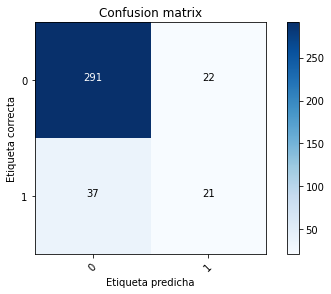

In [ ]:
# Metricas para conjunto test(prueba)
acc_test_best = accuracy_score(y_test, y_test_pred_b)
pre_test_best = precision_score(y_test, y_test_pred_b)
rcall_test_best = recall_score(y_test, y_test_pred_b)
f1_test_best = f1_score(y_test, y_test_pred_b)
cm_test_best = confusion_matrix(y_test, y_test_pred_b, labels=best_clf.classes_)

print(f"Metricas para el conjunto test(prueba)")
print(f"Accuracy = {round(acc_test_best,3)}")
print(f"Precision= {round(pre_test_best,3)}")
print(f"Recall   = {round(rcall_test_best,3)}")
print(f"F1       = {round(f1_test_best,3)}")
plot_confusion_matrix(cm_test_best, best_clf.classes_)

#### Metricas para el conjunto de entrenamiento

Metricas para el conjunto train(entrenamiento)
Accuracy = 0.831
Precision= 0.5
Recall   = 0.418
F1       = 0.456


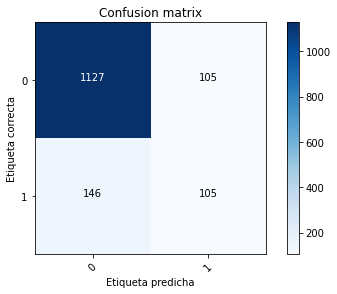

In [ ]:
# Metricas para conjunto train(entrenamiento)
acc_train_best = accuracy_score(y_train, y_train_pred_b)
pre_train_best = precision_score(y_train, y_train_pred_b)
rcall_train_best = recall_score(y_train, y_train_pred_b)
f1_train_best = f1_score(y_train, y_train_pred_b)
cm_train_best = confusion_matrix(y_train, y_train_pred_b, labels=best_clf.classes_)

print(f"Metricas para el conjunto train(entrenamiento)")
print(f"Accuracy = {round(acc_train_best,3)}")
print(f"Precision= {round(pre_train_best,3)}")
print(f"Recall   = {round(rcall_train_best,3)}")
print(f"F1       = {round(f1_train_best,3)}")
plot_confusion_matrix(cm_train_best, best_clf.classes_)

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html